# Step 1: Exploratory Data Analysis


In [1]:
#Installation of required libraries
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action = "ignore") 

In [2]:
#Read the dataset
df = pd.read_csv("/content/diabetes.csv")

In [3]:
# The 5 observation units of the data set were accessed.
df.head()

,FastingGlc,AfterGlc,BloodPressure,SkinThickness,Insulin,BMI,GeneticCorr,Age,Outcome
0,148,203,72,35,0,33.6,0.627,50,1
1,85,140,66,29,0,26.6,0.351,31,0
2,183,238,64,0,0,23.3,0.672,32,1
3,89,144,66,23,94,28.1,0.167,21,0
4,137,192,40,35,168,43.1,2.288,33,1


In [4]:
# The size of the data set was examined. It consists of 768 observation units and 9 variables.
df.shape

(768, 9)

In [5]:
#Feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FastingGlc     768 non-null    int64  
 1   AfterGlc       768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   GeneticCorr    768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Descriptive statistics of the data set accessed.
df.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
FastingGlc,768.0,120.894531,31.972618,0.000,85.000,99.00000,117.0000,140.25000,167.0000,181.00000,196.00000,199.00
AfterGlc,768.0,175.894531,31.972618,55.000,140.000,154.00000,172.0000,195.25000,222.0000,236.00000,251.00000,254.00
BloodPressure,768.0,69.105469,19.355807,0.000,54.000,62.00000,72.0000,80.00000,88.0000,90.00000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.000,0.00000,23.0000,32.00000,40.0000,44.00000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.000,0.00000,30.5000,127.25000,210.0000,293.00000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,23.600,27.30000,32.0000,36.60000,41.5000,44.39500,50.75900,67.10
GeneticCorr,768.0,0.471876,0.331329,0.078,0.165,0.24375,0.3725,0.62625,0.8786,1.13285,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,22.000,24.00000,29.0000,41.00000,51.0000,58.00000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.00


In [7]:
# The distribution of the Outcome variable was examined.
df["Outcome"].value_counts()*100/len(df)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [8]:
# The classes of the outcome variable were examined.
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

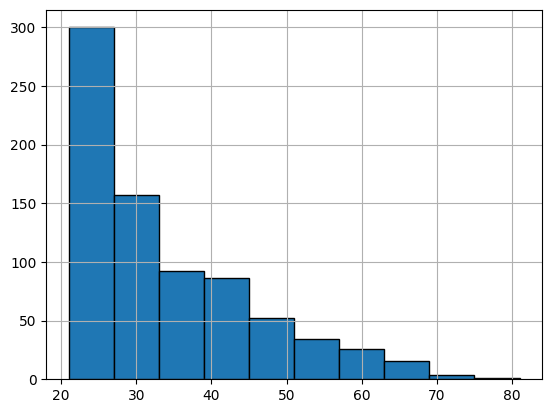

In [9]:
# The histagram of the Age variable was reached.
df["Age"].hist(edgecolor = "black");

In [10]:
print("Max Age: " + str(df["Age"].max()) + " Min Age: " + str(df["Age"].min()))


Max Age: 81 Min Age: 21


In [11]:
print(df.columns)


Index(['FastingGlc', 'AfterGlc', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'GeneticCorr', 'Age', 'Outcome'],
      dtype='object')


In [ ]:
# Histogram and density graphs of all variables were accessed.
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(df.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(df.FastingGlc, bins = 20, ax=ax[0,1]) 
sns.distplot(df.AfterGlc, bins = 20, ax=ax[1,0]) 
sns.distplot(df.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(df.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(df.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(df.GeneticCorr, bins = 20, ax=ax[3,0]) 
sns.distplot(df.BMI, bins = 20, ax=ax[3,1])


In [12]:
df.groupby("Outcome").agg({"FastingGlc":"mean"})


,FastingGlc
Outcome,
0,109.980000
1,141.257463


In [13]:
df.groupby("Outcome").agg({"Age":"mean", "FastingGlc":"mean", "AfterGlc":"mean", "BloodPressure":"mean", "SkinThickness":"mean", "Insulin":"mean", "BMI":"mean", "GeneticCorr":"mean"})


,Age,FastingGlc,AfterGlc,BloodPressure,SkinThickness,Insulin,BMI,GeneticCorr
Outcome,,,,,,,,
0,31.190000,109.980000,164.980000,68.184000,19.664000,68.792000,30.304200,0.429734
1,37.067164,141.257463,196.257463,70.824627,22.164179,100.335821,35.142537,0.550500


In [14]:
df.groupby("Outcome").agg({"Age": "max"})


,Age
Outcome,
0,81
1,70


In [15]:
df.groupby("BloodPressure").agg({"Age": "mean"})


,Age
BloodPressure,
0,30.714286
24,21.000000
30,29.500000
38,26.000000
40,33.000000
44,27.000000
46,22.000000
48,23.800000
50,29.000000


In [16]:
df.groupby("Outcome").agg({"Insulin": "mean", "FastingGlc": "mean", "AfterGlc": "mean", 
                            "BloodPressure": "mean", "SkinThickness": "mean", "BMI": "mean", 
                            "GeneticCorr": "mean", "Age": "mean"})


,Insulin,FastingGlc,AfterGlc,BloodPressure,SkinThickness,BMI,GeneticCorr,Age
Outcome,,,,,,,,
0,68.792000,109.980000,164.980000,68.184000,19.664000,30.304200,0.429734,31.190000
1,100.335821,141.257463,196.257463,70.824627,22.164179,35.142537,0.550500,37.067164


In [17]:
df.groupby("Outcome").agg({"Insulin": "max"})


,Insulin
Outcome,
0,744
1,846


In [18]:
df.groupby("Outcome").agg({"AfterGlc": "mean"})


,AfterGlc
Outcome,
0,164.980000
1,196.257463


In [19]:
df.groupby("Outcome").agg({"FastingGlc": "max", "AfterGlc": "max"})


,FastingGlc,AfterGlc
Outcome,,
0,197,252
1,199,254


In [20]:
df.groupby("Outcome").agg({"BMI": "mean"})


,BMI
Outcome,
0,30.304200
1,35.142537


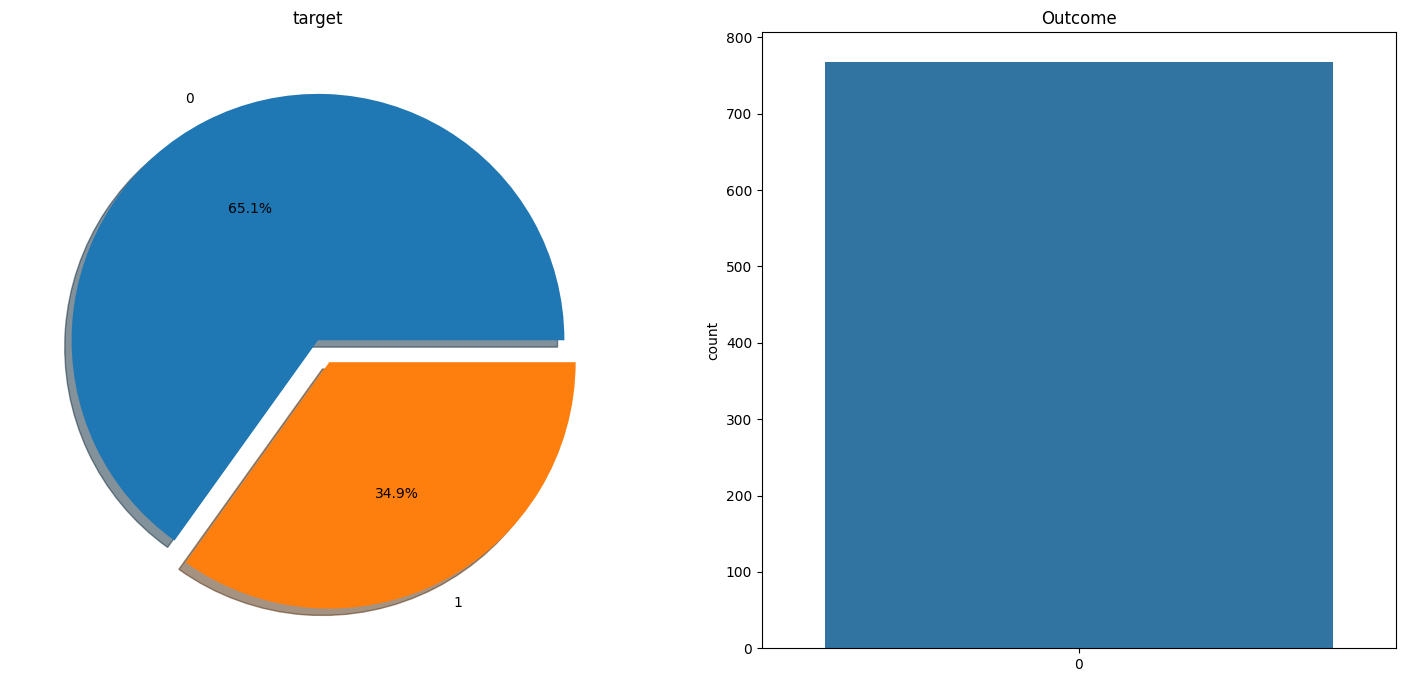

In [21]:
# The distribution of the outcome variable in the data was examined and visualized.
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot(df['Outcome'], ax=ax[1])
ax[1].set_title('Outcome')
plt.show()


Here's how we modify the code to provide access to the correlation of the dataset and describe the relationships between the variables based on the correlation values:



In [22]:
# Compute the correlation matrix
corr = df.corr()

# Print the correlation matrix
print("Correlation matrix:")
print(corr)

# Describe the relationships between the variables
print("\nRelationships between the variables:")
for i in range(len(corr)):
    for j in range(i+1, len(corr)):
        if corr.iloc[i,j] > 0:
            print(f"{corr.index[i]} and {corr.columns[j]} have a positive correlation ({corr.iloc[i,j]:.2f})")
        elif corr.iloc[i,j] < 0:
            print(f"{corr.index[i]} and {corr.columns[j]} have a negative correlation ({corr.iloc[i,j]:.2f})")
        else:
            print(f"{corr.index[i]} and {corr.columns[j]} have no correlation ({corr.iloc[i,j]:.2f})")


Correlation matrix:
               FastingGlc  AfterGlc  BloodPressure  SkinThickness   Insulin  \
FastingGlc       1.000000  1.000000       0.152590       0.057328  0.331357   
AfterGlc         1.000000  1.000000       0.152590       0.057328  0.331357   
BloodPressure    0.152590  0.152590       1.000000       0.207371  0.088933   
SkinThickness    0.057328  0.057328       0.207371       1.000000  0.436783   
Insulin          0.331357  0.331357       0.088933       0.436783  1.000000   
BMI              0.221071  0.221071       0.281805       0.392573  0.197859   
GeneticCorr      0.137337  0.137337       0.041265       0.183928  0.185071   
Age              0.263514  0.263514       0.239528      -0.113970 -0.042163   
Outcome          0.466581  0.466581       0.065068       0.074752  0.130548   

                    BMI  GeneticCorr       Age   Outcome  
FastingGlc     0.221071     0.137337  0.263514  0.466581  
AfterGlc       0.221071     0.137337  0.263514  0.466581  
BloodPressur

In [23]:
# Access to the correlation of the data set was provided. What kind of relationship is examined between the variables. 
# If the correlation value is> 0, there is a positive correlation. While the value of one variable increases, the value of the other variable also increases.
# Correlation = 0 means no correlation.
# If the correlation is <0, there is a negative correlation. While one variable increases, the other variable decreases. 
# When the correlations are examined, there are 2 variables that act as a positive correlation to the Salary dependent variable.
# These variables are Glucose. As these increase, Outcome variable increases.
df.corr()

,FastingGlc,AfterGlc,BloodPressure,SkinThickness,Insulin,BMI,GeneticCorr,Age,Outcome
FastingGlc,1.000000,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
AfterGlc,1.000000,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.152590,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.057328,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,0.331357,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.221071,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
GeneticCorr,0.137337,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.263514,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.466581,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


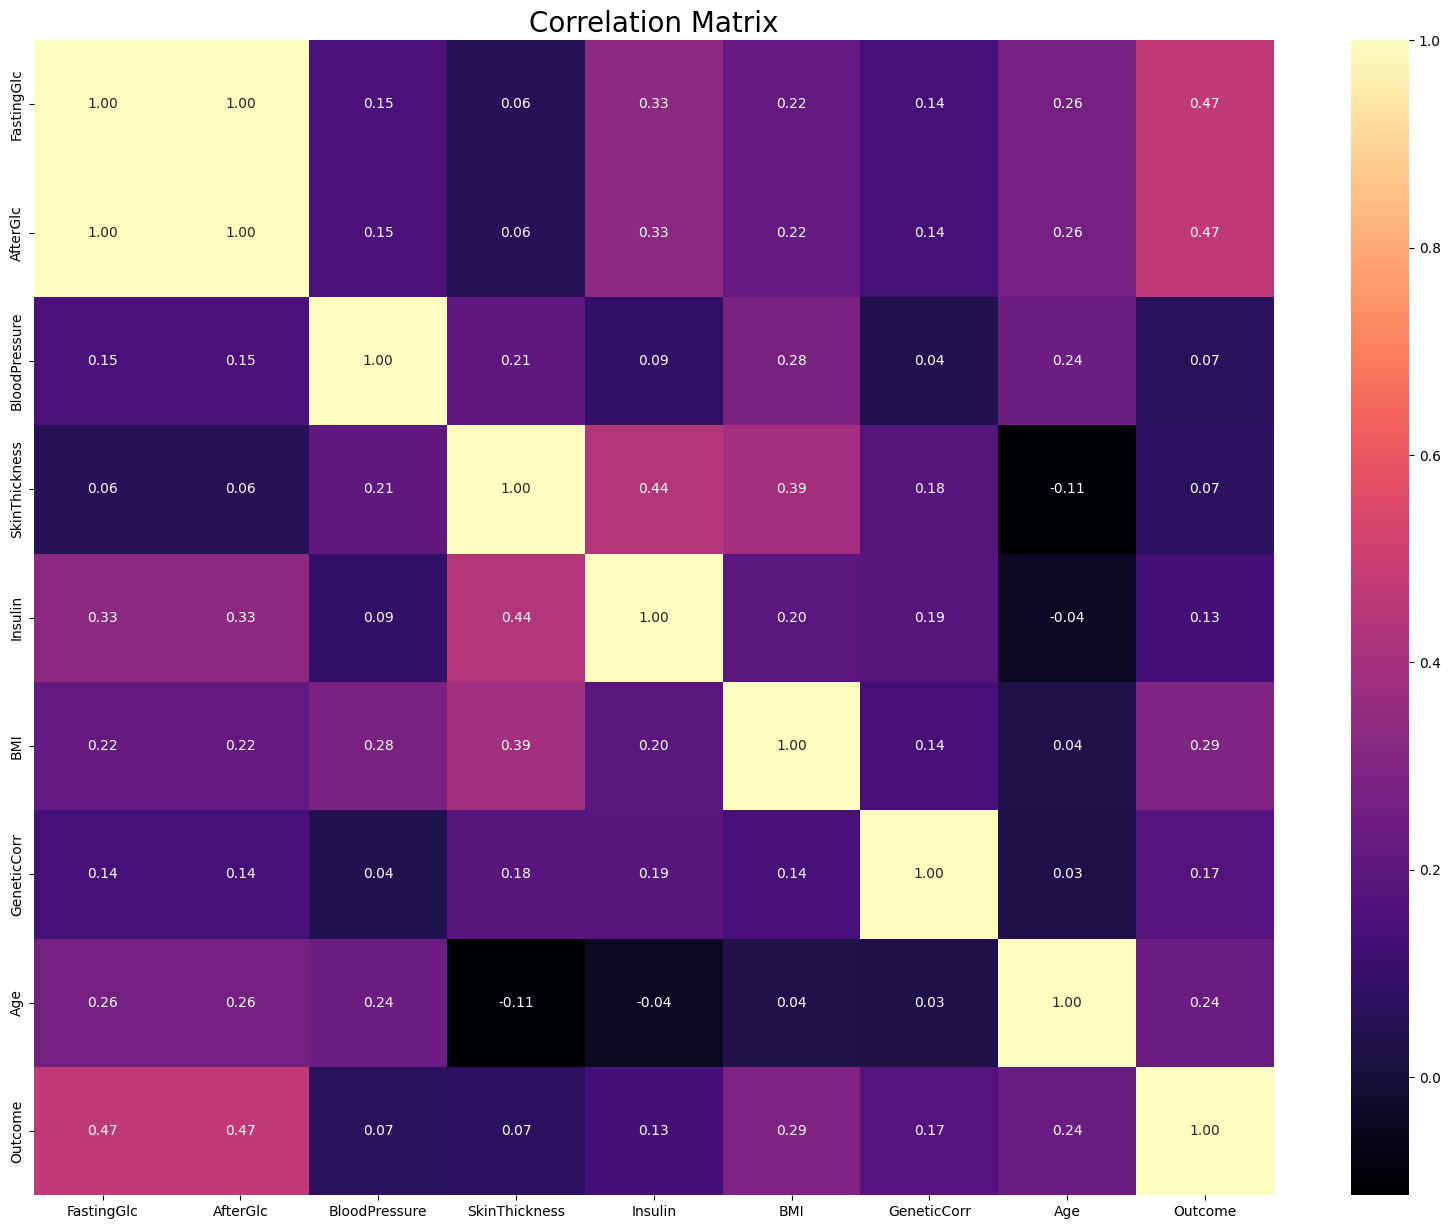

In [24]:
# Correlation matrix graph of the data set
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

# Step 2:  Data Preprocessing

**2.1 Missing Observation Analysis**

We saw on df.head() that some features contain 0, it doesn't make sense here and this indicates missing value Below we replace 0 value by NaN:



In [25]:
df[['FastingGlc', 'AfterGlc', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['FastingGlc', 'AfterGlc', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)


In [26]:
df.head()


,FastingGlc,AfterGlc,BloodPressure,SkinThickness,Insulin,BMI,GeneticCorr,Age,Outcome
0,148.0,203,72.0,35.0,NaN,33.6,0.627,50,1
1,85.0,140,66.0,29.0,NaN,26.6,0.351,31,0
2,183.0,238,64.0,NaN,NaN,23.3,0.672,32,1
3,89.0,144,66.0,23.0,94.0,28.1,0.167,21,0
4,137.0,192,40.0,35.0,168.0,43.1,2.288,33,1


In [27]:
# Now, we can look at where are missing values
df.isnull().sum()

FastingGlc         5
AfterGlc           0
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
GeneticCorr        0
Age                0
Outcome            0
dtype: int64

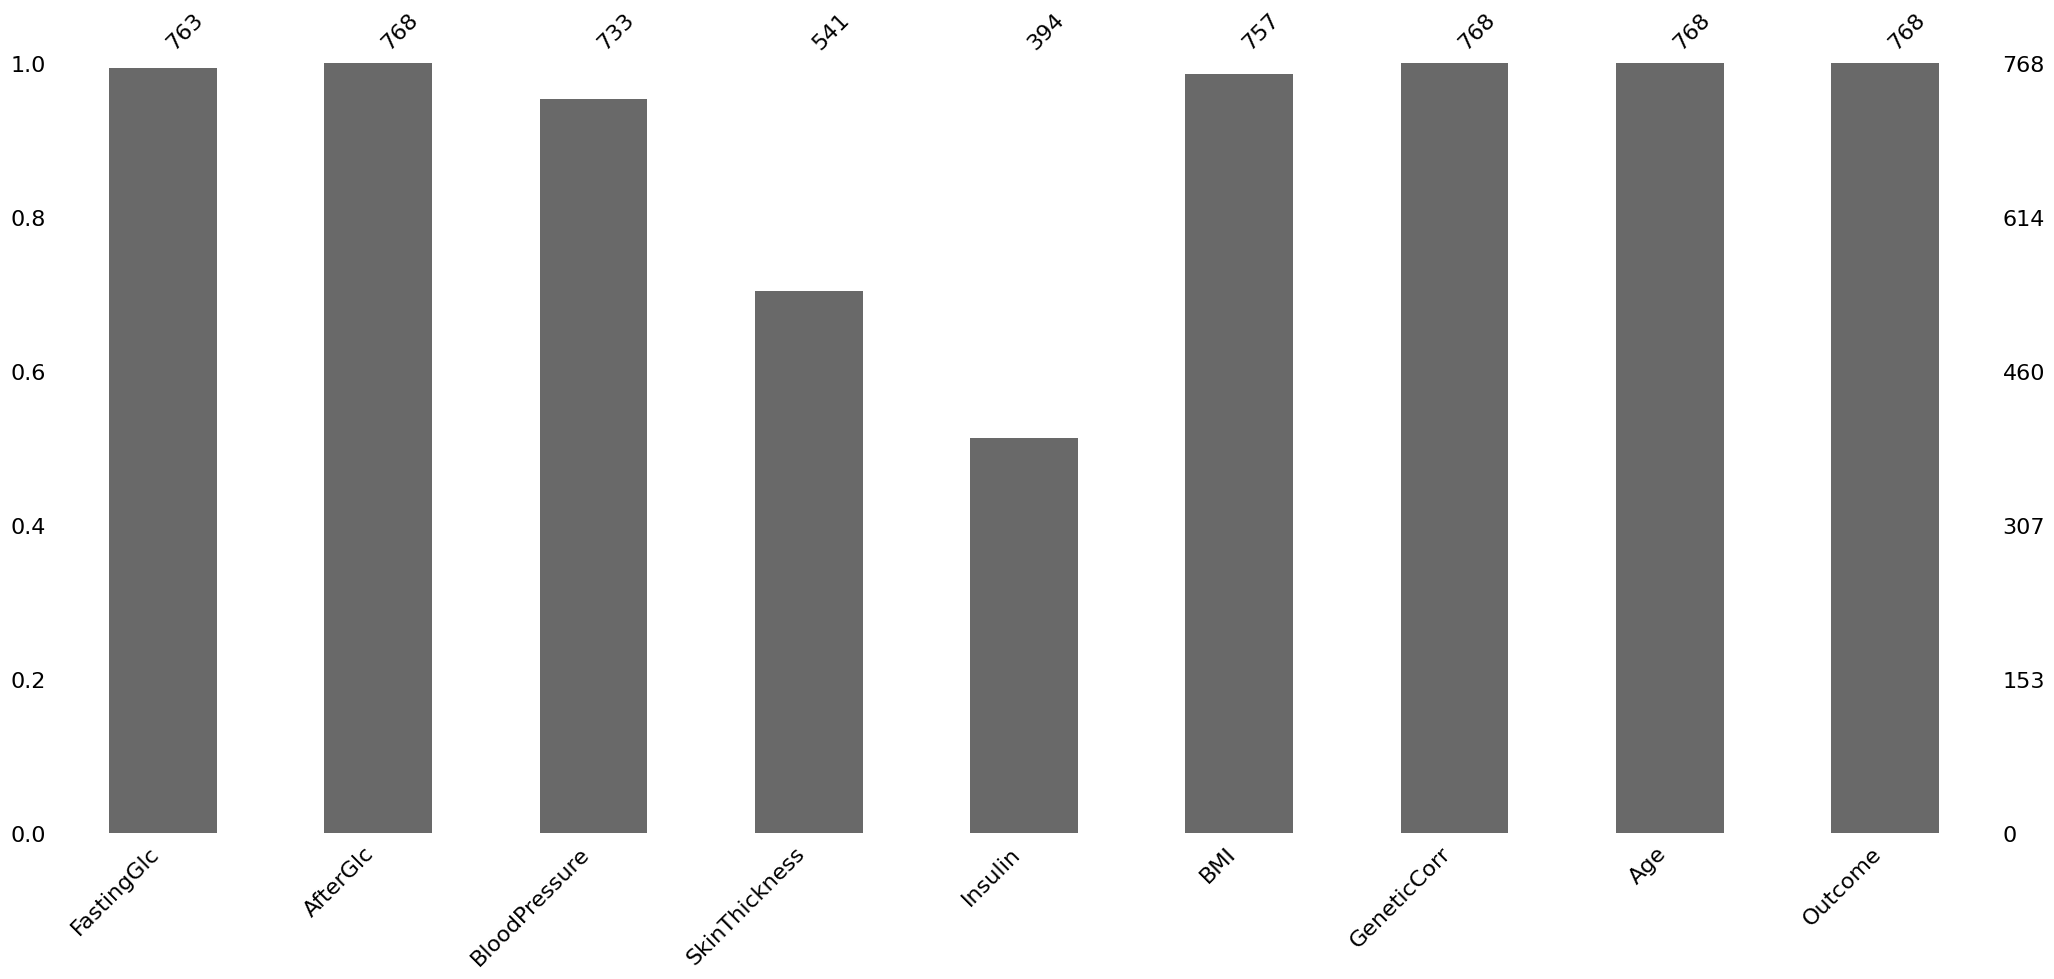

In [28]:
# Have been visualized using the missingno library for the visualization of missing observations.
# Plotting 
import missingno as msno
msno.bar(df);

In [29]:
# The missing values ​​will be filled with the median values ​​of each variable.
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [30]:
# The values to be given for incomplete observations are given the median value of people who are not sick and the median values of people who are sick.
columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

In [31]:
# Missing values were filled.
df.isnull().sum()

FastingGlc       0
AfterGlc         0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
GeneticCorr      0
Age              0
Outcome          0
dtype: int64

**2.2 Outlier Observation Analysis**

In [32]:
# In the data set, there were asked whether there were any outlier observations compared to the 25% and 75% quarters.
# It was found to be an outlier observation.
for feature in df:
    
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if df[(df[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

FastingGlc no
AfterGlc no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
GeneticCorr yes
Age yes
Outcome no


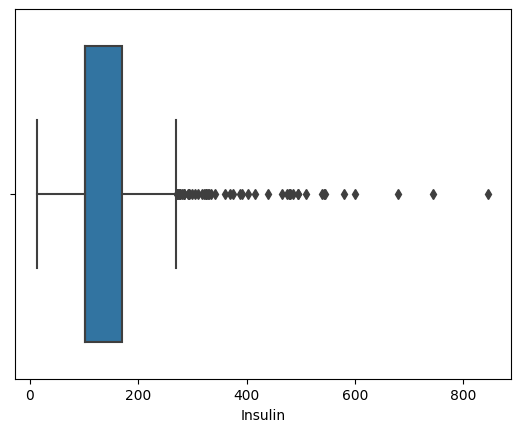

In [33]:
# The process of visualizing the Insulin variable with boxplot method was done. We find the outlier observations on the chart.
import seaborn as sns
sns.boxplot(x = df["Insulin"]);

In [34]:
#We conduct a stand alone observation review for the Insulin variable
#We suppress contradictory values
Q1 = df.Insulin.quantile(0.25)
Q3 = df.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df.loc[df["Insulin"] > upper,"Insulin"] = upper

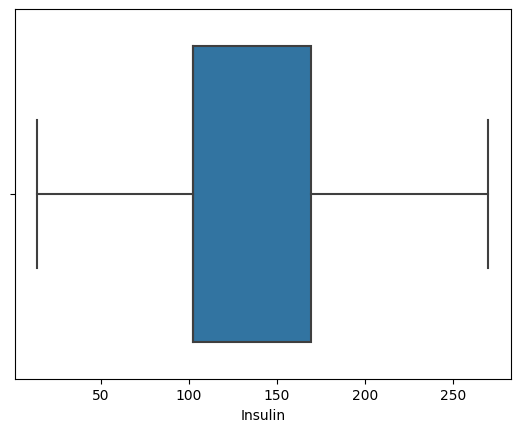

In [35]:
import seaborn as sns
sns.boxplot(x = df["Insulin"]);

**2.3 Local Outlier Factor (LOF)**

In [36]:
# We determine outliers between all variables with the LOF method
from sklearn.neighbors import LocalOutlierFactor
lof =LocalOutlierFactor(n_neighbors= 10)
lof.fit_predict(df)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1

In [37]:
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:30]

array([-3.30045271, -3.25941969, -3.25923715, -2.75500086, -2.74019946,
       -2.62839048, -2.40801921, -2.15307857, -2.11263402, -2.06278672,
       -1.94605835, -1.86440988, -1.85489419, -1.79434402, -1.68758362,
       -1.68689298, -1.67541265, -1.67116027, -1.67076008, -1.66064372,
       -1.65974773, -1.64457653, -1.64028099, -1.61554798, -1.60318791,
       -1.58378153, -1.57636374, -1.55086815, -1.54620839, -1.52113071])

In [38]:
#We choose the threshold value according to lof scores
threshold = np.sort(df_scores)[7]
threshold

-2.1530785676760638

In [39]:
#We delete those that are higher than the threshold
outlier = df_scores > threshold
df = df[outlier]

In [40]:
# The size of the data set was examined.
df.shape

(760, 9)

# Step 3: Feature Engineering

Creating new variables is important for models. But you need to create a logical new variable. For this data set, some new variables were created according to BMI, Insulin and glucose variables.

In [41]:
# According to BMI, some ranges were determined and categorical variables were assigned.
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")
df["NewBMI"] = NewBMI
df.loc[df["BMI"] < 18.5, "NewBMI"] = NewBMI[0]
df.loc[(df["BMI"] > 18.5) & (df["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"] > 24.9) & (df["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
df.loc[(df["BMI"] > 29.9) & (df["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
df.loc[(df["BMI"] > 34.9) & (df["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
df.loc[df["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]

In [42]:
df.head()

,FastingGlc,AfterGlc,BloodPressure,SkinThickness,Insulin,BMI,GeneticCorr,Age,Outcome,NewBMI
0,148.0,203,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1
1,85.0,140,66.0,29.0,102.5,26.6,0.351,31,0,Overweight
2,183.0,238,64.0,32.0,169.5,23.3,0.672,32,1,Normal
3,89.0,144,66.0,23.0,94.0,28.1,0.167,21,0,Overweight
4,137.0,192,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3


In [43]:
# A categorical variable creation process is performed according to the insulin value.
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"

In [44]:
# The operation performed was added to the dataframe.
df = df.assign(NewInsulinScore=df.apply(set_insulin, axis=1))

df.head()

,FastingGlc,AfterGlc,BloodPressure,SkinThickness,Insulin,BMI,GeneticCorr,Age,Outcome,NewBMI,NewInsulinScore
0,148.0,203,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal
1,85.0,140,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal
2,183.0,238,64.0,32.0,169.5,23.3,0.672,32,1,Normal,Abnormal
3,89.0,144,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal
4,137.0,192,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal


In [45]:
# Define the category labels
glucose_labels = pd.Series(["Low", "Normal", "Overweight", "High"], dtype="category")

# Create the new categorical variables based on the glucose levels
df["FastingGlcCategory"] = glucose_labels[0]
df.loc[df["FastingGlc"] > 70, "FastingGlcCategory"] = glucose_labels[1]
df.loc[df["FastingGlc"] > 99, "FastingGlcCategory"] = glucose_labels[2]
df.loc[df["FastingGlc"] > 126, "FastingGlcCategory"] = glucose_labels[3]

df["AfterGlcCategory"] = glucose_labels[0]
df.loc[df["AfterGlc"] > 70, "AfterGlcCategory"] = glucose_labels[1]
df.loc[df["AfterGlc"] > 99, "AfterGlcCategory"] = glucose_labels[2]
df.loc[df["AfterGlc"] > 126, "AfterGlcCategory"] = glucose_labels[3]


In [46]:
df.head()

,FastingGlc,AfterGlc,BloodPressure,SkinThickness,Insulin,BMI,GeneticCorr,Age,Outcome,NewBMI,NewInsulinScore,FastingGlcCategory,AfterGlcCategory
0,148.0,203,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal,High,High
1,85.0,140,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal,Normal,High
2,183.0,238,64.0,32.0,169.5,23.3,0.672,32,1,Normal,Abnormal,High,High
3,89.0,144,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal,Normal,High
4,137.0,192,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal,High,High


#  Step 4: One Hot Encoding

Categorical variables in the data set should be converted into numerical values. For this reason, these transformation processes are performed with Label Encoding and One Hot Encoding method.

In [48]:
print(df.columns)


Index(['FastingGlc', 'AfterGlc', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'GeneticCorr', 'Age', 'Outcome', 'NewBMI', 'NewInsulinScore',
       'FastingGlcCategory', 'AfterGlcCategory'],
      dtype='object')


In [49]:
# Here, by making One Hot Encoding transformation, categorical variables were converted into numerical values. It is also protected from the Dummy variable trap.
df = pd.get_dummies(df, columns=["NewBMI", "NewInsulinScore", "FastingGlcCategory", "AfterGlcCategory"], drop_first=True)



In [50]:
df.head()


,FastingGlc,AfterGlc,BloodPressure,SkinThickness,Insulin,BMI,GeneticCorr,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,FastingGlcCategory_Low,FastingGlcCategory_Normal,FastingGlcCategory_Overweight,AfterGlcCategory_Normal,AfterGlcCategory_Overweight
0,148.0,203,72.0,35.0,169.5,33.6,0.627,50,1,1,0,0,0,0,0,0,0,0,0,0
1,85.0,140,66.0,29.0,102.5,26.6,0.351,31,0,0,0,0,1,0,1,0,1,0,0,0
2,183.0,238,64.0,32.0,169.5,23.3,0.672,32,1,0,0,0,0,0,0,0,0,0,0,0
3,89.0,144,66.0,23.0,94.0,28.1,0.167,21,0,0,0,0,1,0,1,0,1,0,0,0
4,137.0,192,40.0,35.0,168.0,43.1,2.288,33,1,0,0,1,0,0,0,0,0,0,0,0


In [51]:
print(df.columns)


Index(['FastingGlc', 'AfterGlc', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'GeneticCorr', 'Age', 'Outcome', 'NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal',
       'FastingGlcCategory_Low', 'FastingGlcCategory_Normal',
       'FastingGlcCategory_Overweight', 'AfterGlcCategory_Normal',
       'AfterGlcCategory_Overweight'],
      dtype='object')


In [53]:
categorical_df = df[[
    'NewBMI_Obesity 1', 'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight', 'NewBMI_Underweight',
    'NewInsulinScore_Normal',
    'FastingGlcCategory_Low', 'FastingGlcCategory_Normal', 'FastingGlcCategory_Overweight',
    'AfterGlcCategory_Normal', 'AfterGlcCategory_Overweight'
]]


In [54]:
categorical_df.head()


,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,FastingGlcCategory_Low,FastingGlcCategory_Normal,FastingGlcCategory_Overweight,AfterGlcCategory_Normal,AfterGlcCategory_Overweight
0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,1,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,1,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [56]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)
cols = X.columns
index = X.index



In [57]:
X.head()


,FastingGlc,AfterGlc,BloodPressure,SkinThickness,Insulin,BMI,GeneticCorr,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,FastingGlcCategory_Low,FastingGlcCategory_Normal,FastingGlcCategory_Overweight,AfterGlcCategory_Normal,AfterGlcCategory_Overweight
0,148.0,203,72.0,35.0,169.5,33.6,0.627,50,1,0,0,0,0,0,0,0,0,0,0
1,85.0,140,66.0,29.0,102.5,26.6,0.351,31,0,0,0,1,0,1,0,1,0,0,0
2,183.0,238,64.0,32.0,169.5,23.3,0.672,32,0,0,0,0,0,0,0,0,0,0,0
3,89.0,144,66.0,23.0,94.0,28.1,0.167,21,0,0,0,1,0,1,0,1,0,0,0
4,137.0,192,40.0,35.0,168.0,43.1,2.288,33,0,0,1,0,0,0,0,0,0,0,0


In [58]:
from sklearn.preprocessing import RobustScaler

# Define the columns to standardize
cols = ['FastingGlc', 'AfterGlc', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'GeneticCorr', 'Age']

# Fit and transform the data using RobustScaler
transformer = RobustScaler().fit(df[cols])
df[cols] = transformer.transform(df[cols])


In [59]:
X.head()


,FastingGlc,AfterGlc,BloodPressure,SkinThickness,Insulin,BMI,GeneticCorr,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,FastingGlcCategory_Low,FastingGlcCategory_Normal,FastingGlcCategory_Overweight,AfterGlcCategory_Normal,AfterGlcCategory_Overweight
0,148.0,203,72.0,35.0,169.5,33.6,0.627,50,1,0,0,0,0,0,0,0,0,0,0
1,85.0,140,66.0,29.0,102.5,26.6,0.351,31,0,0,0,1,0,1,0,1,0,0,0
2,183.0,238,64.0,32.0,169.5,23.3,0.672,32,0,0,0,0,0,0,0,0,0,0,0
3,89.0,144,66.0,23.0,94.0,28.1,0.167,21,0,0,0,1,0,1,0,1,0,0,0
4,137.0,192,40.0,35.0,168.0,43.1,2.288,33,0,0,1,0,0,0,0,0,0,0,0


In [60]:
X = pd.concat([X,categorical_df], axis = 1)


In [61]:
X.head()

,FastingGlc,AfterGlc,BloodPressure,SkinThickness,Insulin,BMI,GeneticCorr,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,...,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,FastingGlcCategory_Low,FastingGlcCategory_Normal,FastingGlcCategory_Overweight,AfterGlcCategory_Normal,AfterGlcCategory_Overweight
0,148.0,203,72.0,35.0,169.5,33.6,0.627,50,1,0,...,0,0,0,0,0,0,0,0,0,0
1,85.0,140,66.0,29.0,102.5,26.6,0.351,31,0,0,...,0,0,1,0,1,0,1,0,0,0
2,183.0,238,64.0,32.0,169.5,23.3,0.672,32,0,0,...,0,0,0,0,0,0,0,0,0,0
3,89.0,144,66.0,23.0,94.0,28.1,0.167,21,0,0,...,0,0,1,0,1,0,1,0,0,0
4,137.0,192,40.0,35.0,168.0,43.1,2.288,33,0,0,...,0,1,0,0,0,0,0,0,0,0


In [62]:
y.head()


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# Step 5 : Models


In [63]:
# Validation scores of all base models

models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 12345)))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('SVM', SVC(gamma='auto', random_state = 12345)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345)))

# evaluate each model in turn
results = []
names = []

In [64]:
!pip install pycaret






Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 KB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 KB 5.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 KB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 66.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 KB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 17.1 MB/s eta 0:00:0

LogisticRegression: 0.853947 (0.030263)
DecisionTree: 0.853947 (0.036010)
SVM: 0.839474 (0.032657)


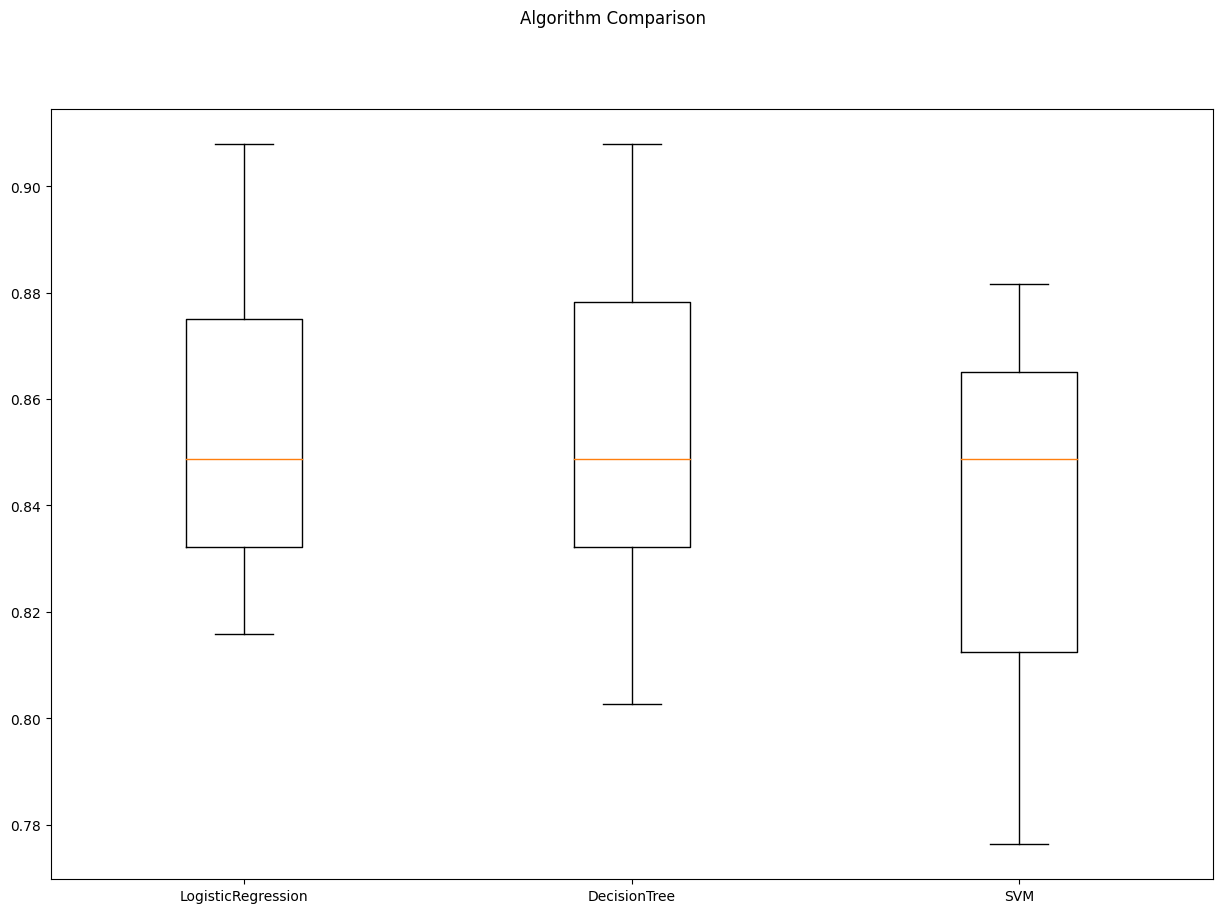

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your features are in the variable X and target variable is in y

# Encode the categorical features in X
X_encoded = pd.get_dummies(X)

# If the target variable is categorical, use label encoding
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Define your models as a list of tuples with model names and their respective objects
models = [
    ("LogisticRegression", LogisticRegression()),
    ("DecisionTree", DecisionTreeClassifier()),
    ("SVM", SVC())
]

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=12345, shuffle=True)
    cv_results = cross_val_score(model, X_encoded, y_encoded, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = plt.figure(figsize=(15, 10))
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()




In [67]:
print(df.head())


   FastingGlc  AfterGlc  BloodPressure  SkinThickness   Insulin       BMI  \
0    0.751515  0.751515          0.000       1.000000  1.000000  0.171745   
1   -0.775758 -0.775758         -0.375       0.142857  0.000000 -0.603878   
2    1.600000  1.600000         -0.500       0.571429  1.000000 -0.969529   
3   -0.678788 -0.678788         -0.375      -0.714286 -0.126866 -0.437673   
4    0.484848  0.484848         -2.000       1.000000  0.977612  1.224377   

   GeneticCorr       Age  Outcome  NewBMI_Obesity 1  NewBMI_Obesity 2  \
0     0.663192  1.235294        1                 1                 0   
1    -0.056026  0.117647        0                 0                 0   
2     0.780456  0.176471        1                 0                 0   
3    -0.535505 -0.470588        0                 0                 0   
4     4.991531  0.235294        1                 0                 0   

   NewBMI_Obesity 3  NewBMI_Overweight  NewBMI_Underweight  \
0                 0                 

In [68]:
print(df.columns)


Index(['FastingGlc', 'AfterGlc', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'GeneticCorr', 'Age', 'Outcome', 'NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal',
       'FastingGlcCategory_Low', 'FastingGlcCategory_Normal',
       'FastingGlcCategory_Overweight', 'AfterGlcCategory_Normal',
       'AfterGlcCategory_Overweight'],
      dtype='object')


# Step 6: Model Tuning


## 1.Random Forests Tuning


In [69]:
rf_params = {"n_estimators" :[100,200,500,1000], 
             "max_features": [3,5,7], 
             "min_samples_split": [2,5,10,30],
            "max_depth": [3,5,8,None]}

In [70]:
rf_model = RandomForestClassifier(random_state = 12345)

In [71]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# Assuming your features are in the variable X and the target variable is in y

# Encode the categorical features in X
X_encoded = pd.get_dummies(X)

# If the target variable is categorical, use label encoding
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Define the random forest model
rf_model = RandomForestClassifier()

# Define the parameter grid for the random forest model
rf_params = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Perform the grid search with cross-validation
gs_cv = GridSearchCV(rf_model,
                     rf_params,
                     cv=10,
                     n_jobs=-1,
                     verbose=2).fit(X_encoded, y_encoded)

# Print the best parameters and the corresponding score
print("Best parameters found: ", gs_cv.best_params_)
print("Best score found: ", gs_cv.best_score_)


Fitting 10 folds for each of 288 candidates, totalling 2880 fits
Best parameters found:  {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Best score found:  0.8828947368421053


In [72]:
gs_cv.best_params_


{'bootstrap': False,
 'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 50}

**1.2.Final Model Installation**

In [73]:
rf_tuned = RandomForestClassifier(**gs_cv.best_params_)


In [74]:


# Fit the model
rf_tuned = rf_tuned.fit(X_encoded, y_encoded)


In [75]:
# Use cross_val_score with the encoded data
cv_score = cross_val_score(rf_tuned, X_encoded, y_encoded, cv=10).mean()

print("Cross-validation score:", cv_score)


Cross-validation score: 0.8710526315789473


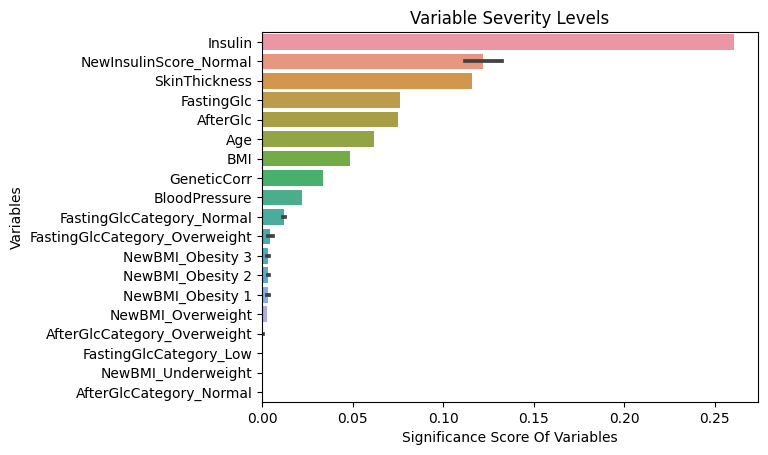

In [76]:
# Get the column names from the encoded dataset
encoded_columns = X_encoded.columns

feature_imp = pd.Series(rf_tuned.feature_importances_,
                        index=encoded_columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()


### 2.LightGBM Tuning

In [77]:
lgbm = LGBMClassifier(random_state = 12345)


In [78]:
lgbm_params = {"learning_rate": [0.01, 0.03, 0.05, 0.1, 0.5],
              "n_estimators": [500, 1000, 1500],
              "max_depth":[3,5,8]}

In [81]:
def remove_duplicate_columns(df):
    duplicate_columns = df.columns[df.columns.duplicated()]
    if not duplicate_columns.empty:
        print(f"Duplicate columns found: {list(duplicate_columns)}")
        df = df.loc[:, ~df.columns.duplicated()]
    return df

# Remove duplicate columns from the feature matrix X_encoded
X_encoded = remove_duplicate_columns(X_encoded)
# Perform GridSearchCV with the encoded dataset
gs_cv = GridSearchCV(lgbm, 
                     lgbm_params, 
                     cv=10, 
                     n_jobs=-1, 
                     verbose=2).fit(X_encoded, y)



Duplicate columns found: ['NewBMI_Obesity 1', 'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight', 'NewBMI_Underweight', 'NewInsulinScore_Normal', 'FastingGlcCategory_Low', 'FastingGlcCategory_Normal', 'FastingGlcCategory_Overweight', 'AfterGlcCategory_Normal', 'AfterGlcCategory_Overweight']
Fitting 10 folds for each of 45 candidates, totalling 450 fits


In [82]:
gs_cv.best_params_


{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}

**2.1 Model Installation**


In [84]:
def remove_duplicate_columns(df):
    duplicate_columns = df.columns[df.columns.duplicated()]
    if not duplicate_columns.empty:
        print(f"Duplicate columns found: {list(duplicate_columns)}")
        df = df.loc[:, ~df.columns.duplicated()]
    return df

# Apply one-hot encoding to the dataset
X_encoded = pd.get_dummies(X)

# Remove duplicate columns from the feature matrix X_encoded
X_encoded = remove_duplicate_columns(X_encoded)

# Fit the LightGBM model with the best parameters and the encoded dataset
lgbm_tuned = LGBMClassifier(**gs_cv.best_params_).fit(X_encoded, y)


Duplicate columns found: ['NewBMI_Obesity 1', 'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight', 'NewBMI_Underweight', 'NewInsulinScore_Normal', 'FastingGlcCategory_Low', 'FastingGlcCategory_Normal', 'FastingGlcCategory_Overweight', 'AfterGlcCategory_Normal', 'AfterGlcCategory_Overweight']


In [85]:
# Compute cross-validation score with the encoded dataset
cv_score = cross_val_score(lgbm_tuned, X_encoded, y, cv=10).mean()
print(cv_score)


0.8947368421052632


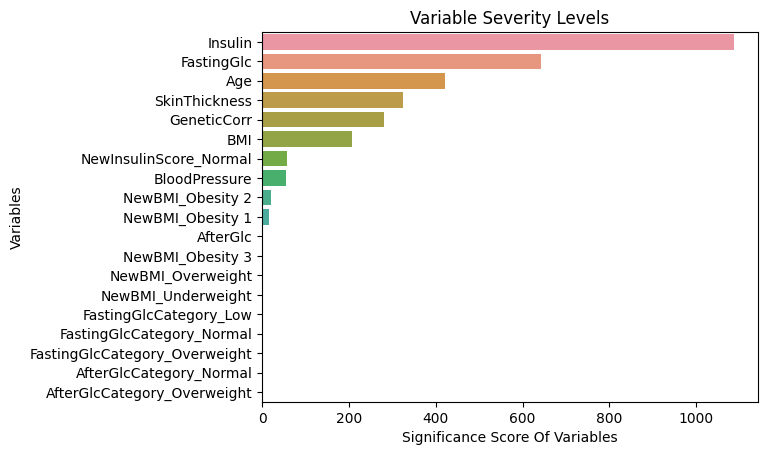

In [86]:
feature_imp = pd.Series(lgbm_tuned.feature_importances_,
                        index=X_encoded.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()


## XGBoost Tuning

In [87]:
xgb = GradientBoostingClassifier(random_state = 12345)


In [88]:
xgb_params = {
    "learning_rate": [0.01, 0.1, 0.2, 1],
    "min_samples_split": np.linspace(0.1, 0.5, 10),
    "max_depth":[3,5,8],
    "subsample":[0.5, 0.9, 1.0],
    "n_estimators": [100,1000]}

In [95]:
def add_suffix_to_duplicate_columns(df):
    cols = pd.Series(df.columns)
    for dup in cols[cols.duplicated()].unique(): 
        cols[cols[cols == dup].index.values.tolist()] = [dup + '_' + str(i) if i != 0 else dup for i in range(sum(cols == dup))]
    df.columns = cols
    return df

# Add suffix to duplicate columns in the feature matrix X
X = add_suffix_to_duplicate_columns(X)


In [99]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Assuming xgb_params are defined

# Create an XGBoost classifier
xgb_model = XGBClassifier()

# Perform RandomizedSearchCV for XGBoost model with the given parameters and 10-fold cross-validation
xgb_cv_model = RandomizedSearchCV(xgb_model, xgb_params, n_iter=100, cv=10, n_jobs=-1, verbose=2, random_state=42).fit(X, y)


Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[19:19:50] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



In [103]:
print(X.shape)
print(y.shape)

(760, 30)
(760,)


In [104]:
xgb_cv_model.best_params_


{'learning_rate': 0.01,
 'max_depth': 3,
 'min_samples_split': 0.1,
 'n_estimators': 1000,
 'subsample': 1.0}

**3.1 Final Model Installation**


In [105]:
xgb_tuned = GradientBoostingClassifier(**xgb_cv_model.best_params_).fit(X,y)


In [106]:
cross_val_score(xgb_tuned, X, y, cv = 10).mean()


0.8855263157894736

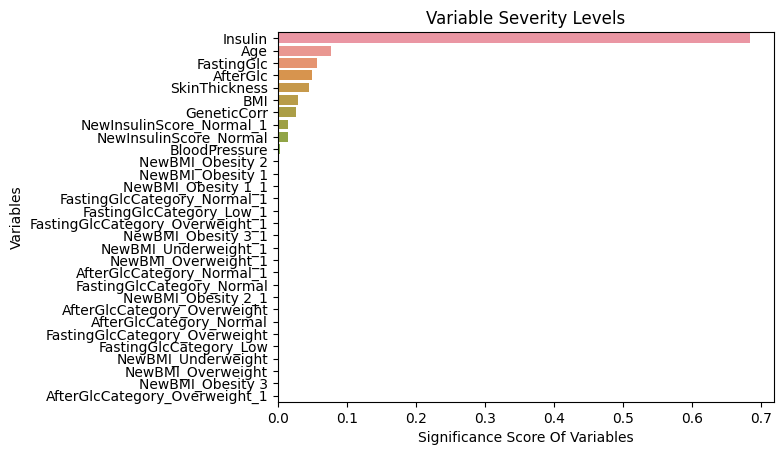

In [107]:
feature_imp = pd.Series(xgb_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()

# Step 7: Comparison of Final Models


In [108]:
models = []

models.append(('RF', RandomForestClassifier(random_state = 12345, max_depth = 8, max_features = 7, min_samples_split = 2, n_estimators = 500)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345, learning_rate = 0.1, max_depth = 5, min_samples_split = 0.1, n_estimators = 100, subsample = 1.0)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345, learning_rate = 0.01,  max_depth = 3, n_estimators = 1000)))

# evaluate each model in turn
results = []
names = []

RF: 0.884211 (0.016434)
XGB: 0.884211 (0.023390)
LightGBM: 0.884211 (0.024119)


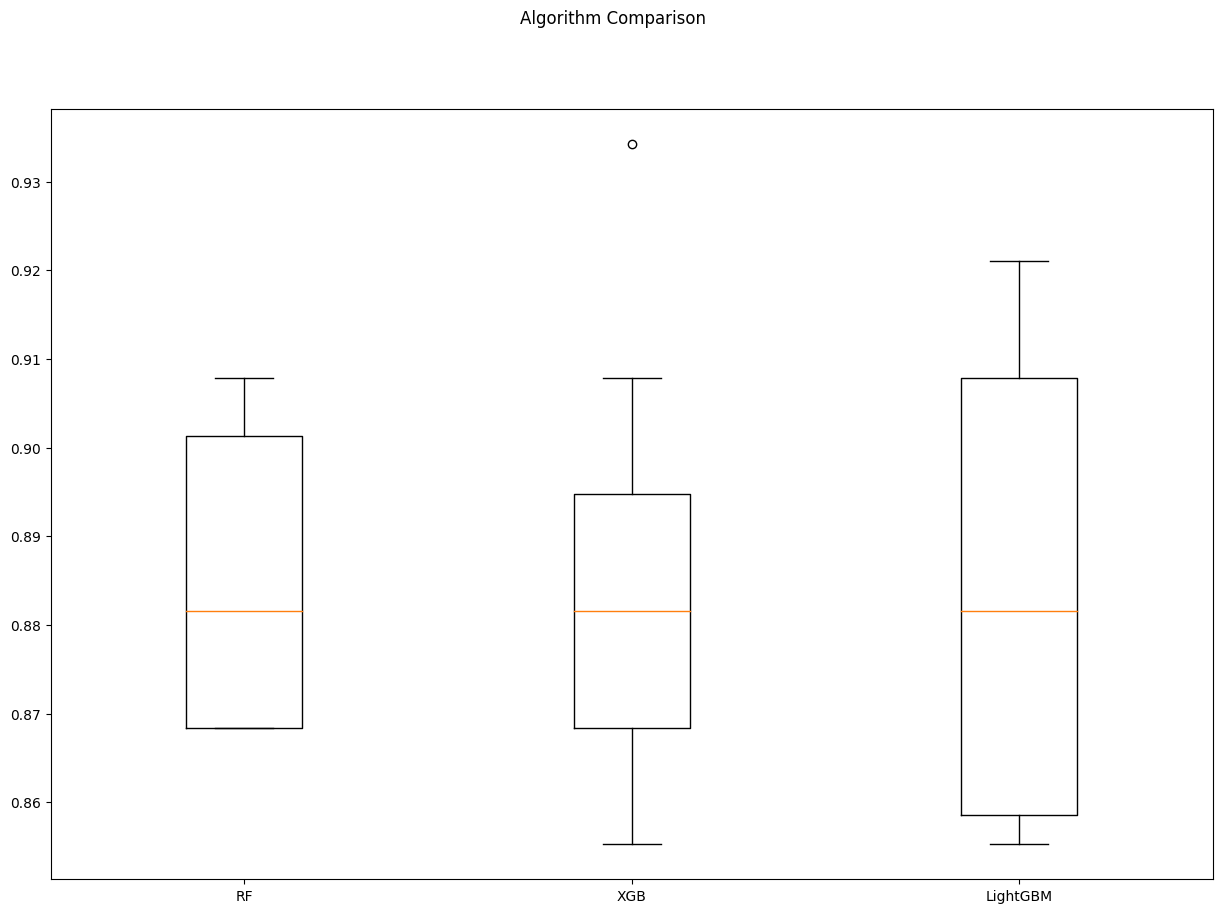

In [110]:
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt

# Assuming models list is defined with model names and instances
# models = [...]
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=12345)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot algorithm comparison
fig = plt.figure(figsize=(15, 10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


### Reporting
The aim of this study was to create classification models for the diabetes data set and to predict whether a person is sick by establishing models and to obtain maximum validation scores in the established models. The work done is as follows:
Diabetes Data Set read.

With Exploratory Data Analysis; The data set's structural data were checked.

The types of variables in the dataset were examined. Size information of the dataset was accessed. The 0 values in the data set are missing values. Primarily these 0 values were replaced with NaN values. Descriptive statistics of the data set were examined.

1. Data Preprocessing section;
df for: The NaN values missing observations were filled with the median values of whether each variable was sick or not. The outliers were determined by LOF and dropped. The X variables were standardized with the rubost method..

2. During Model Building;
Logistic Regression, KNN, SVM, CART, Random Forests, XGBoost, LightGBM like using machine learning models Cross Validation Score were calculated. Later Random Forests, XGBoost, LightGBM hyperparameter optimizations optimized to increase Cross Validation value.

3. Result;
The XGBoost hyperparameter optimization model was found to have the lowest cross-validation score value of 0.90.



